# Using Health Factors to Predict Heart Disease Diagnosis

## 1. Introduction

Heart disease comprises a variety of conditions that affect the heart such as coronary heart disease (blood vessel narrowing), arrhythmia (abnormal heartbeat), cardiomyopathy (heart muscle disease), and more (Mayo Foundation for Medical Education and Research, 2022). There are many risk factors associated with the disease including high cholesterol, high blood pressure, obesity, and smoking. Heart disease is the leading cause of death in the United States and the second leading cause of death in Canada (Centers for Disease Control and Prevention, 2023; Government of Canada, 2022). Due to its prevalence, conducting data analyses such as the following are important so we can better understand one’s risk for the disease and take early steps to prevent or treat it. 

The question we will be trying to answer with this analysis is: Can health factors be used to predict heart disease diagnosis?

To answer this question, we will be using the Cleveland dataset in the Heart Disease database from UC Irvine Machine Learning Repository, found at: https://archive.ics.uci.edu/dataset/45/heart+disease.
This dataset contains 14 variables: age, sex, chest pain (cp), resting blood pressure (trestbps), cholesterol (chol), fasting blood sugar (fbs), electrocardiogram reading at rest (restecg), maximum heart rate (thalach), exercise induced angina (exang), ST depression induced by exercise (oldpeak), exercise segment slope (slope), number of major vessels coloured by fluoroscopy (ca), heart condition (thal), and diagnosis of heart disease (num). There were originally 76 attributes in the dataset; however, only 14 of them are being used. Through classification techniques such as K-nearest neighbours, we will use these variables to predict diagnosis of heart disease. 

## 2. Preliminary Exploratory Data Analysis

### Loading in libraries

In [1]:
library(tidyverse)
library(ggplot2)
library(cowplot)
library(tidymodels)
library(repr)

install.packages("themis")
library(themis)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
“package ‘cowplot’ was built under R version 4.3.2”

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1

## 3. Methods

Our final goal is to create a K nearest neighbours (KNN) classification model that predicts the 'heart_disease_diagnosis' using the predictor variable that we choose to be optimal. We will do this through the following steps:
1. Read-in the dataset from the URL
2. Tidy the dataset
3. Split the data into training and testing datasets
4. Analyze the dataset using scatter-plots to determine which variable has the optimal significance. By plotting different variables in the training dataset we can see how different variables vary in range over different 'heart_disease_diagnosis' categories.
5. Find the optimal $k$ value using cross validation and build the model.
6. Evaluate the model
7. Present conclusions and takeaways from our model

### 1. Reading in the data
* We read the data directly from the url
* We will have to assign column names to the dataset as it is labelled
* For the target variable we are interested in, we will have to turn it into a factor
* We will select the possible predictor variables which have numerical values, and exclude the variables that are categorical (we do not consider them as predictors for this analysis).

In [2]:
#let's read the data in from online
heart_disease <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data")
colnames(heart_disease) <- c("age", "sex", "chest_pain", "trest_bps", "chol", "fbs", "resting_ecg", 
                             "max_hr", "exer_agina", "st_depr", "exercise_segment_slope", 
                             "num_major_vessels", "heart_condition", "disease_diagnosis")


print("Figure 1.0: Heart Disease Dataset")
heart_disease

New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Figure 1.0: Heart Disease Dataset"


age,sex,chest_pain,trest_bps,chol,fbs,resting_ecg,max_hr,exer_agina,st_depr,exercise_segment_slope,num_major_vessels,heart_condition,disease_diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2
53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


### 2. Tidying the dataset

In [3]:
# Let's clean up the table by giving the categorical names to the values 
# of the variables which should be factors

# David: I suggest we don't turn the target variable into a non numerical value (I remember the prof mentioning that)

#heart_disease <- heart_disease |>
#                mutate(disease_diagnosis = as.factor(disease_diagnosis)) |>
#                mutate(disease_diagnosis = fct_recode(disease_diagnosis, 
#                                               "no disease" = "0", "possible" = "1",
#                                              "likely" = "2", "certain" = "3", "severe" = "4"))


heart_disease <- heart_disease |>
                mutate(disease_diagnosis = as.factor(disease_diagnosis)) 


print("Figure 2.0: Mutated Dataset")
heart_disease

[1] "Figure 2.0: Mutated Dataset"


age,sex,chest_pain,trest_bps,chol,fbs,resting_ecg,max_hr,exer_agina,st_depr,exercise_segment_slope,num_major_vessels,heart_condition,disease_diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2
53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


One thing we notice in the dataframe is that there are very few observations that have the "severe" diagnosis for heart disease (denoted as 4). In fact, it looks like most of the observations say that the patient has no disease, this is something we will have to keep in mind for constructing our KNN-classification model later.

In [4]:
# we do not need all of these variables, so let's take the ones that seem most useful
heart_select <- heart_disease |>
            select(age, trest_bps, chol, max_hr, st_depr, disease_diagnosis)

print("Figure 2.1: Selected Dataset")
glimpse(heart_select)

[1] "Figure 2.1: Selected Dataset"
Rows: 302
Columns: 6
$ age               <dbl> 67, 67, 37, 41, 56, 62, 57, 63, 53, 57, 56, 56, 44, …
$ trest_bps         <dbl> 160, 120, 130, 130, 120, 140, 120, 130, 140, 140, 14…
$ chol              <dbl> 286, 229, 250, 204, 236, 268, 354, 254, 203, 192, 29…
$ max_hr            <dbl> 108, 129, 187, 172, 178, 160, 163, 147, 155, 148, 15…
$ st_depr           <dbl> 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 1.4, 3.1, 0.4, 1.…
$ disease_diagnosis <fct> 2, 1, 0, 0, 0, 3, 0, 2, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0…


In [5]:
#Let's see if there are any N/A (marked by "?") values for the variable we want to predict.
#these variables could be heart_condition or heart_disease_diagnosis

heart_disease_na <- filter(heart_select, disease_diagnosis ==  "?")
print("Table 2.2: NA Values")
heart_disease_na

[1] "Table 2.2: NA Values"


age,trest_bps,chol,max_hr,st_depr,disease_diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>


We can see that for the response variable, heart_disease_diagnosis, that no rows have N/A values. Let's continue with our analysis by splitting our wrangled data into training and testing data.

### 3. Splitting data for training and testing

* We will split the data into a 75% training-testing split with 75% of the data in the training set and 25% in the testing set.

In [6]:
set.seed(100) 
# Let's do a 75% split into training data and 25% into testing.

heart_split <- initial_split(heart_select, prop = 0.75, strata = disease_diagnosis)
heart_training <- training(heart_split)
heart_testing <- testing(heart_split)

### 4. Analyzing training data

Lets look at the instances of the diagnosis in the training set by grouping by diagnosis class and then counting occurances.

In [7]:
instances <- heart_training |>
    group_by(disease_diagnosis) |>
    summarize(instances = n())

print("Table 4.0: Instances")
instances

[1] "Table 4.0: Instances"


disease_diagnosis,instances
<fct>,<int>
0,122
1,41
2,26
3,28
4,8


* We see that most of the diagnosis are of the "no disease" category with very few in the "severe" category.
* This is in alignment with are initial observation in the dataset before splitting.

Let's now look into the mean values of the predictors for each category. 

In [8]:
mean_values <- heart_training |>
    group_by(disease_diagnosis) |>
    summarize(age_mean = mean(age),
             trest_bps_mean = mean(trest_bps),
             chol_mean = mean(chol),
             max_hr_mean = mean(max_hr),
            st_depr_mean = mean(st_depr))

print("Table 4.1: Mean Variables Table")
mean_values

[1] "Table 4.1: Mean Variables Table"


disease_diagnosis,age_mean,trest_bps_mean,chol_mean,max_hr_mean,st_depr_mean
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,52.63115,129.8607,245.3443,158.6803,0.5606557
1,55.90244,134.4390,242.3415,145.6341,1.1243902
2,56.73077,133.3462,256.5000,135.9615,1.4230769
3,56.64286,135.3214,242.6071,130.5357,2.0500000
4,61.62500,138.2500,257.6250,138.3750,2.4625000


From this step we notice that:
* There might be a positive relationship between st depression induced by exercise(st_depr_mean) and the diagnosis
* The maximum heart rate for patients without heart disease is higher than with a heart disease dianosis.
* The mean values for most predictor values are close to each other indicating that if there is any relationship between predictor value and diagnosis, it is not very strong.

In order for us to determine how we should choose our predictors for our KNN-classification, let's check the distribution of each potential predictor against the heart disease diagnosis.

[1] "Figure 4.1: Potential Predictors Distribution"


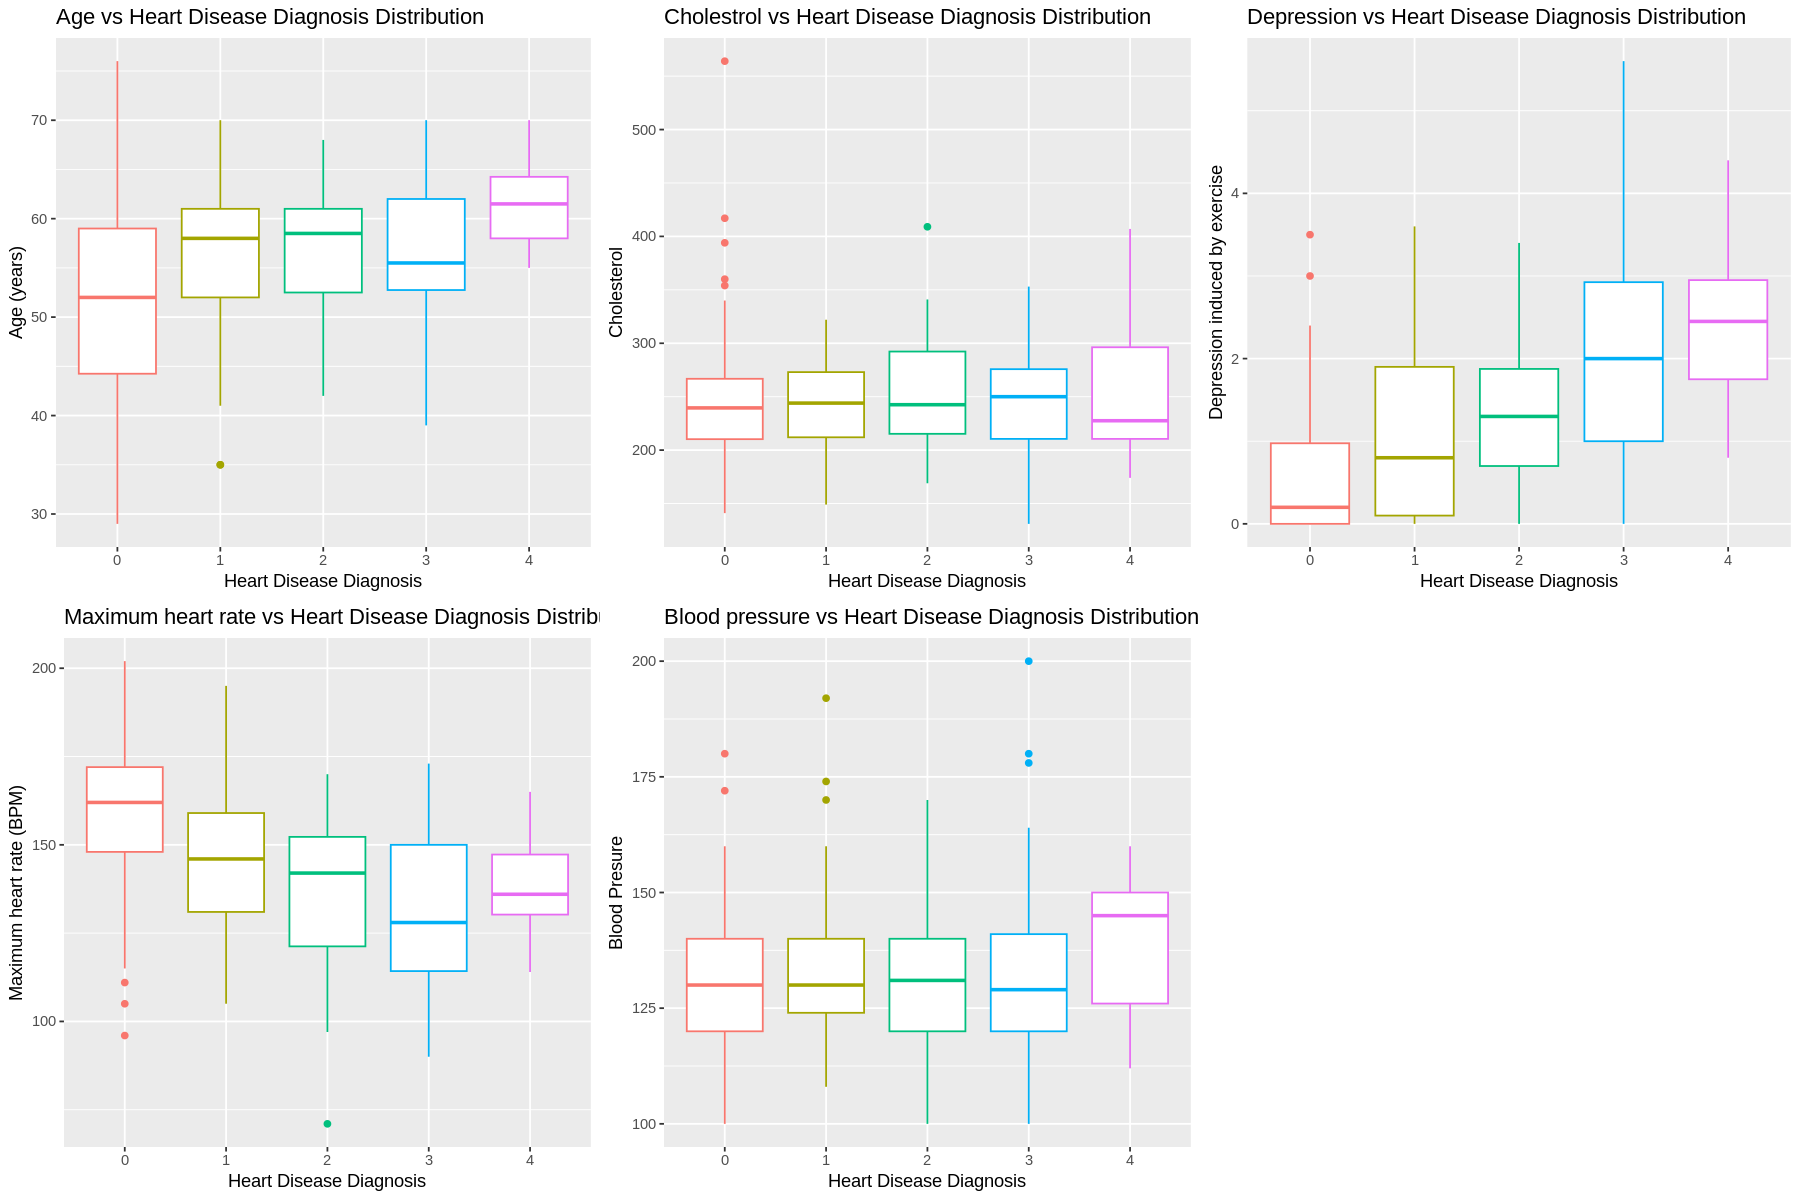

In [9]:
#age
diag_vs_age <- heart_training |>
    ggplot(aes(x = disease_diagnosis, y = age, color = disease_diagnosis)) +
    geom_boxplot(show.legend = FALSE) +
    labs(title = "Age vs Heart Disease Diagnosis Distribution",
        x = "Heart Disease Diagnosis", y = "Age (years)")

#cholestrol
diag_vs_chol <- heart_training |>
    ggplot(aes(x = disease_diagnosis, y = chol, color = disease_diagnosis)) +
    geom_boxplot(show.legend = FALSE) +
    labs(title = "Cholestrol vs Heart Disease Diagnosis Distribution",
        x = "Heart Disease Diagnosis", y = "Cholesterol")


#depression
diag_vs_depr <- heart_training |>
    ggplot(aes(x = disease_diagnosis, y = st_depr, color = disease_diagnosis)) +
    geom_boxplot(show.legend = FALSE) +
    labs(title = "Depression vs Heart Disease Diagnosis Distribution",
        x = "Heart Disease Diagnosis", y = "Depression induced by exercise")

#max heart rate
max_hr_vs_depr <- heart_training |>
    ggplot(aes(x = disease_diagnosis, y = max_hr, color = disease_diagnosis)) +
    geom_boxplot(show.legend = FALSE) +
    labs(title = "Maximum heart rate vs Heart Disease Diagnosis Distribution",
        x = "Heart Disease Diagnosis", y = "Maximum heart rate (BPM)")

#blood pressure
bp_vs_depr <- heart_training |>
    ggplot(aes(x = disease_diagnosis, y = trest_bps, color = disease_diagnosis)) +
    geom_boxplot(show.legend = FALSE) +
    labs(title = "Blood pressure vs Heart Disease Diagnosis Distribution",
        x = "Heart Disease Diagnosis", y = "Blood Presure")

options(repr.plot.width = 15, repr.plot.height = 10)
visualize <- plot_grid(diag_vs_age, diag_vs_chol, diag_vs_depr, max_hr_vs_depr, bp_vs_depr)

print("Figure 4.1: Potential Predictors Distribution")
visualize

* After seeing the distribution and range of values for each of the predictor variables, it appears that the ones which may be the weakest are trest_bps (blood pressure) and chol (cholesterol)
    *   This is because the medians stay mostly constant throughout the box plots for the two variables
* So we will use age, st_depr (depression in ST scale), and max_hr (maximum heart rate) as our predictor variables
    * These variables above seem good because the variety in their range suggests that they will have a significant influence on a patient's diagnosis

#### Visualizing the Predictors

[1] "Figure 4.2: Predictor Plots"


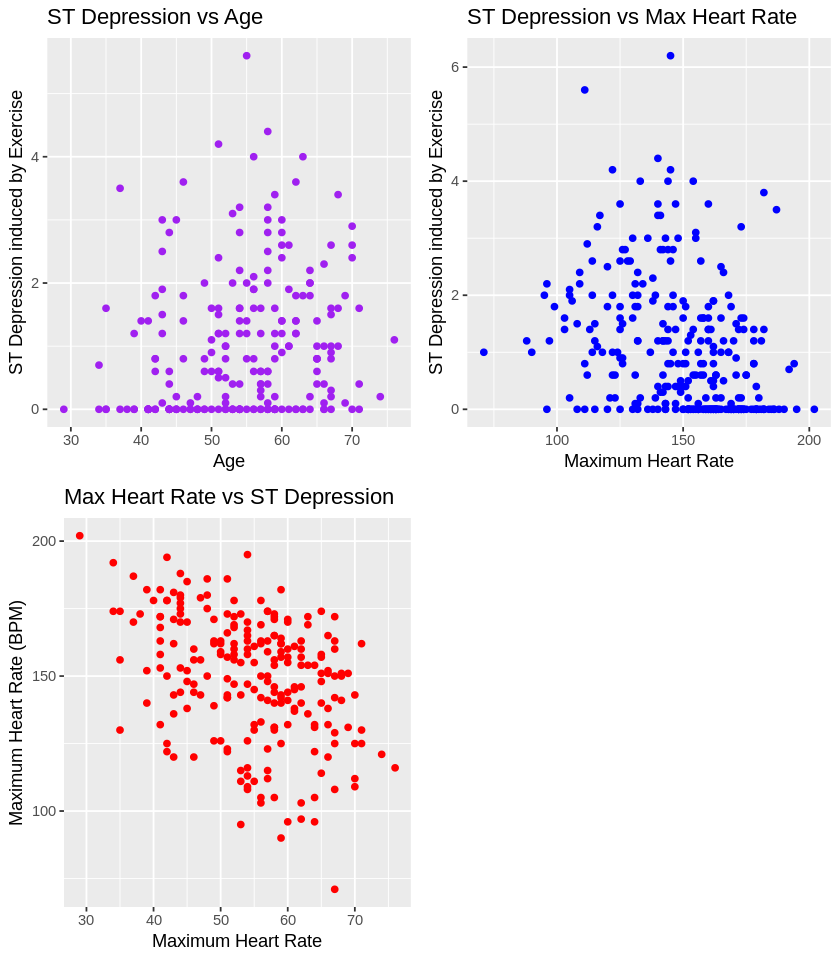

In [10]:
options(repr.plot.height = 8, repr.plot.width = 7)

st_depr_vs_age <- heart_training |>
    ggplot(aes(x = age, y = st_depr)) +
    geom_point(colour = "purple") +
    labs(title = "ST Depression vs Age",
        x = "Age", y = "ST Depression induced by Exercise")

max_hr_vs_depr <- heart_disease |>
    ggplot(aes(x = max_hr, y = st_depr)) +
    geom_point(colour = "blue") +
    labs(title = "ST Depression vs Max Heart Rate",
        x = "Maximum Heart Rate", y = "ST Depression induced by Exercise")


max_hr_vs_age <- heart_training |>
    ggplot(aes(x = age, y = max_hr)) +
    geom_point(colour = "red") +
    labs(title = "Max Heart Rate vs ST Depression",
        x = "Maximum Heart Rate", y = "Maximum Heart Rate (BPM)")

print("Figure 4.2: Predictor Plots")
predictor_plots <- plot_grid(st_depr_vs_age, max_hr_vs_depr, max_hr_vs_age)
predictor_plots

* As we can see above, most of these predictors do not have a destinct relationship that follows any strong linear trend
* An exception to this may be the relationship in the Max Heart Rate vs ST Depression as there seems to be a decreasing relationship,
    * However, the plot is fairly cloudy so the relationship is not strong
* Overall, the independence of the relationships that our predictors above have with one another suggest that we have wisely chosen our predictor variables, which will lower interference from collinearity.

### 5. Finding an optimal k value 
Now we need to find out what an optimal k-value will be for our KNN-classification using cross validation
* First we create a recipe and scale and center the data
* Then, we shall perform a 5-fold cross validation
* The $k$ values for cross validation will be from 1 to 100
* We then represent our results as a plot

In [11]:
options(repr.plot.height = 6, repr.plot.width = 7)

heart_recipe <- recipe(disease_diagnosis ~ age + max_hr + st_depr, data = heart_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors()) 
print("Figure 5.0: Recipe")
heart_recipe

heart_vfold <- vfold_cv(heart_training, v = 5, strata = disease_diagnosis)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
         set_engine("kknn") |>
         set_mode("classification")


[1] "Figure 5.0: Recipe"




── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 3



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



→ A | warning: No observations were detected in `truth` for level(s): '4'
               Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1

There were issues with some computations   A: x1





[1] "Best K-Value:"


[1] 7

[1] "Figure 5.1: Cross-Validation"


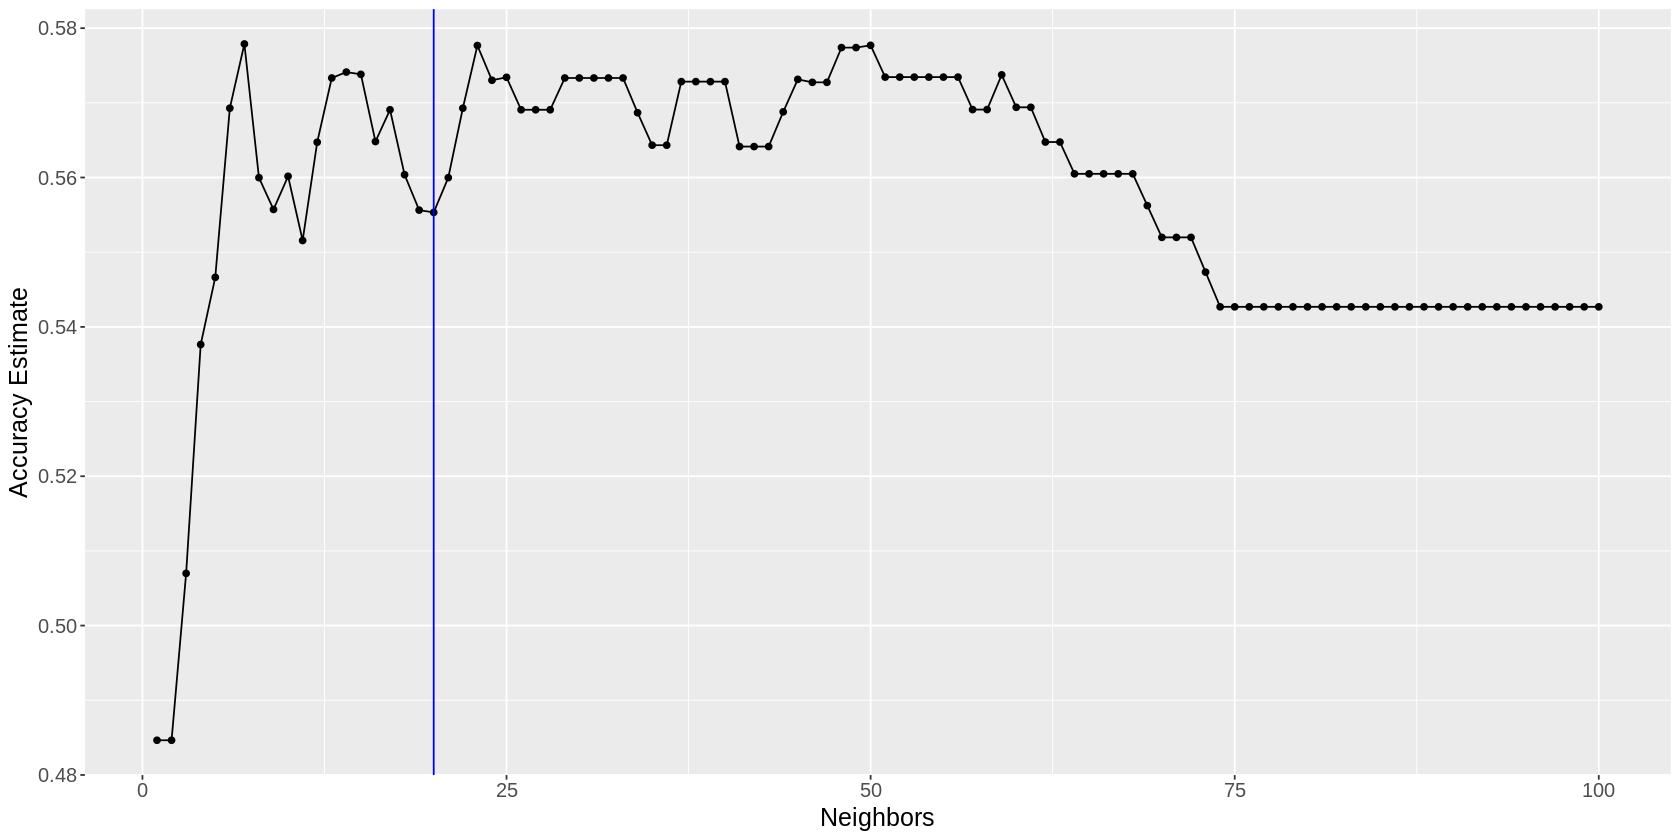

In [12]:
options(repr.plot.width = 14, repr.plot.height = 7)

gridvals = tibble(neighbors = seq(from = 1, to = 100, by = 1))

heart_results <- workflow() |>
            add_recipe(heart_recipe) |>
            add_model(knn_spec) |>
            tune_grid(resamples = heart_vfold, grid = gridvals) |>
            collect_metrics()

# taking the best k-value
best_k <- heart_results |>
    filter(.metric == "accuracy") |>
    slice_max(mean) |>
    pull(neighbors)
print("Best K-Value:")
best_k

accuracies <- heart_results |>
            filter(.metric == "accuracy")

cross_val_plot <- accuracies |>
            ggplot(aes(x = neighbors, y = mean)) + 
                geom_point() +
                geom_line() +
                geom_vline(xintercept = 20, colour = "blue") +
                labs(x = "Neighbors", y = "Accuracy Estimate") + 
                theme(text = element_text(size = 15))

print("Figure 5.1: Cross-Validation")
cross_val_plot

We will choose 'k = 20'
Using this k value we shall build our model for prediction.

In [13]:

heart_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 20) |>
        set_engine("kknn") |>
        set_mode("classification")

heart_fit <- workflow() |>
        add_recipe(heart_recipe) |>
        add_model(heart_spec) |>
        fit(data = heart_training)

print("Figure 5.2: Fit")
heart_fit

[1] "Figure 5.2: Fit"


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(20,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.4355556
Best kernel: rectangular
Best k: 20

### 6. Evaluation and Conclusion of model


Now we apply our trained model to the testing set.

[1] "Table 6.1: Model Accuracy"


.metric,.estimate
<chr>,<dbl>
accuracy,0.4935065


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


[1] "Figure 6.2: Matrix"


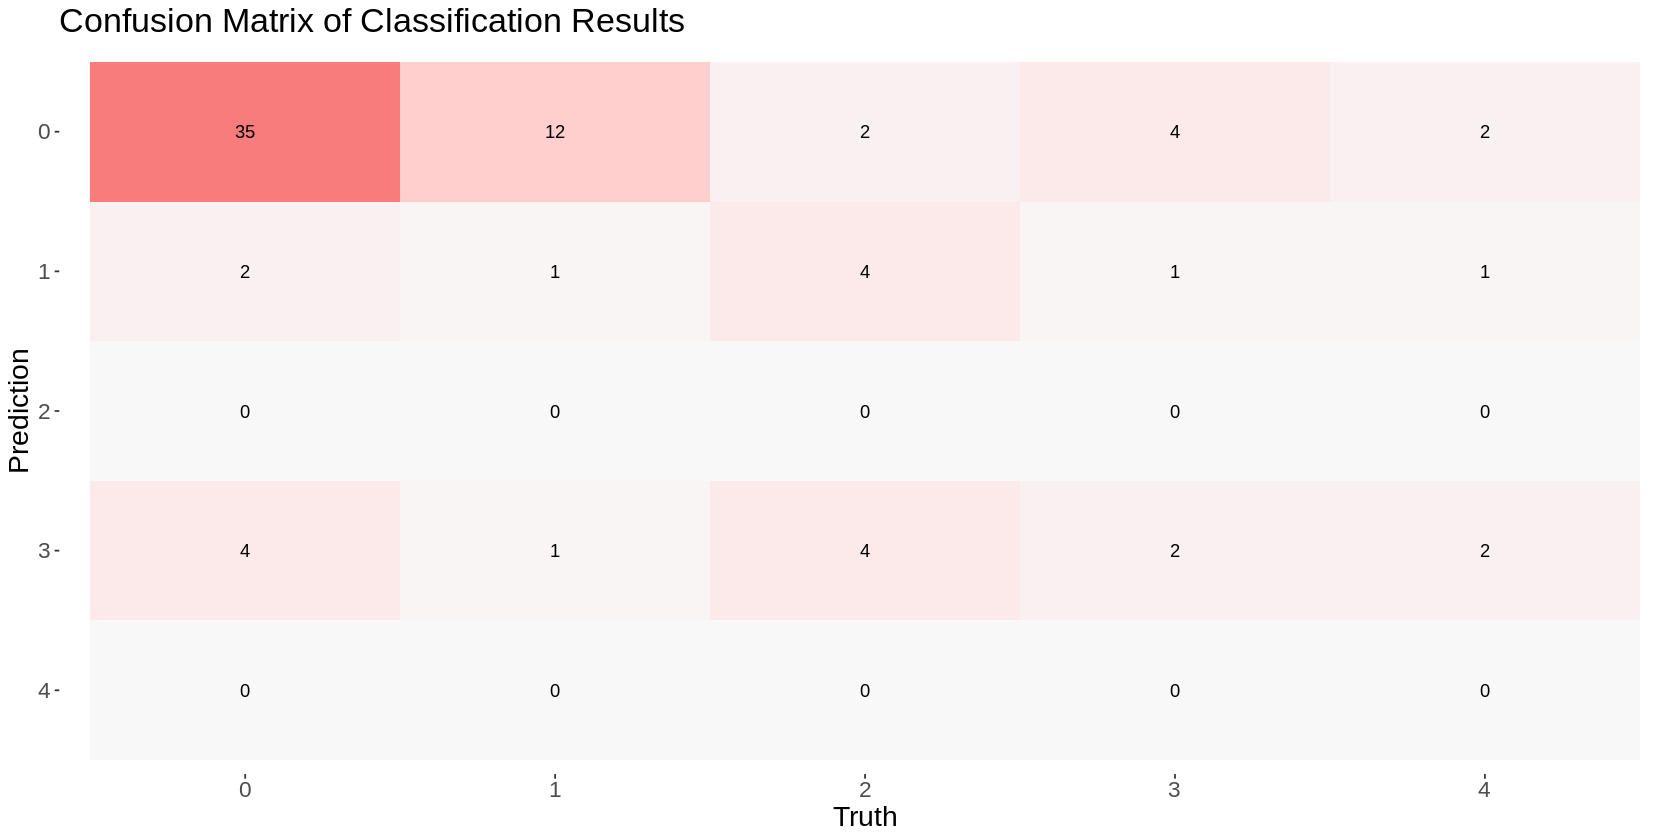

In [16]:
# Finding the accuracy of our prediction

heart_predictions <- predict(heart_fit, heart_testing) |>
        bind_cols(heart_testing)

heart_metrics <- heart_predictions |>
        metrics(truth = disease_diagnosis, estimate = .pred_class) |>
        filter(.metric == "accuracy") |>
        select(.metric, .estimate)
print("Table 6.1: Model Accuracy")
heart_metrics

heart_conf_mat <- heart_predictions |>
        conf_mat(truth = disease_diagnosis, estimate = .pred_class)

heart_matrix <- heart_conf_mat |>
        autoplot(type = "heatmap") +
        scale_fill_gradient(low = "#f8f8f8", high = "#f87c7c") + 
        theme(text = element_text(size = 17)) + 
        labs(title = "Confusion Matrix of Classification Results")
print("Figure 6.2: Matrix")
heart_matrix

From the table (Table 6.1) we can tell that our model has a prediction accuracy of 49.35% when classifying objects in the testing set. We also see that:
* Most of the successful predictions were when the person did not have a heart disease diagnosis. This could be because of an overwhelming the number of data points that indicated the absense of heart disease causing the model to overfit for that diagnosis.
* ...

## 4. Expected outcomes and significance 

We hope and expect to find an accurate method of classifying either one's level of heart disease or varying forms of heart conditions. We expect the correlation between measured variables (e.g. blood pressure) and heart Class to be strong enough that our model can accurately predict an unknown patient's heart Class. As seen in the plots above, the separation of heart Classes seems most clear in the Maximum heart rate versus Age plot, so we expect our model to work most accurately with those two variables. These findings would have profound implications in the medical community, leading to a greater understanding of which factors correlate strongly to heart disease, and thus which factors can be proactively monitored to reduce the amount of people who suffer. 

#### Future questions could include:  
* How applicable are these findings to different populations around the world?
* Which variables have the strongest correlation to heart disease, and how can we mitigate their effects?




### References

Centers for Disease Control and Prevention. (2023, May 15). *Heart Disease  Facts*. Heart Disease. https://www.cdc.gov/heartdisease/facts.htm#:~:text=Coronary%20heart%20disease%20is%20the,killing%20375%2C476%20people%20in%202021.&text=About%201%20in%2020%20adults,have%20CAD%20(about%205%25).&text=In%202021%2C%20about%202%20in,less%20than%2065%20years%20old. 

Government of Canada. (2022, July 28). *Heart Disease in Canada*. Public Health Agency of Canada. https://www.canada.ca/en/public-health/services/publications/diseases-conditions/heart-disease-canada.html 

Mayo Foundation for Medical Education and Research. (2022, August 25). *Heart disease*. Mayo Clinic. https://www.mayoclinic.org/diseases-conditions/heart-disease/symptoms-causes/syc-20353118 